In [30]:
import beam_dynamics
import matplotlib.pyplot as plt
import numpy as np

In [38]:
N = 3

MCFM_beam = beam_dynamics.MCFMBeam(v=27.78, L=36, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=1.33189, N=N, num_t=1000, P0=618049.62 , num_x=1000)
MHFM_beam = beam_dynamics.MHFMBeam(v=27.78, L=36, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=1.33189, N=N, num_t=1000, P0=618049.62, num_x=1000)
MMM_beam = beam_dynamics.MMMBeam(v=27.78, L=36, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=1.33189, N=N, num_t=1000, M=62.892e3, beta=0.25, Gamma=0.50)
MSDMM_beam = beam_dynamics.MSDMMBeam(v=27.78, L=36, C=0, EI=2.1e11 * 0.41, rho=17000, t_end=1.33189, N=N, num_t=10000, Mu=20.892e3, Ms=42.11e3, kv=2.264e6, cv=104.96e3 ,beta=0.25, Gamma=0.50)

# MCFM.animate_beam(MCFM_beam)
# MHFM.animate_beam(MHFM_beam)
;

''

In [39]:
import time

start_time = time.time()
w_vals_MCFM, M_vals_MCFM = MCFM_beam.calculate_midpoint_results()
print(f"Time for MCFM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

start_time = time.time()
w_vals_MHFM, M_vals_MHFM = MHFM_beam.calculate_midpoint_results()
print(f"Time for MHFM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

start_time = time.time()
w_vals_MMM, M_vals_MMM = MMM_beam.calculate_midpoint_results(do_moment=True)
print(f"Time for MMM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

start_time = time.time()
w_vals_MSDMM, M_vals_MSDMM = MSDMM_beam.calculate_midpoint_results(do_moment=True)
print(f"Time for MMM_beam.calculate_midpoint_results: {time.time() - start_time:.2f} seconds")

Time for MCFM_beam.calculate_midpoint_results: 0.20 seconds
Time for MHFM_beam.calculate_midpoint_results: 0.39 seconds
Time for MMM_beam.calculate_midpoint_results: 0.21 seconds
Time for MMM_beam.calculate_midpoint_results: 2.88 seconds


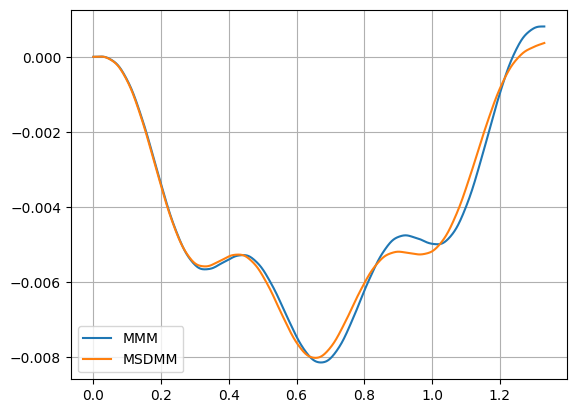

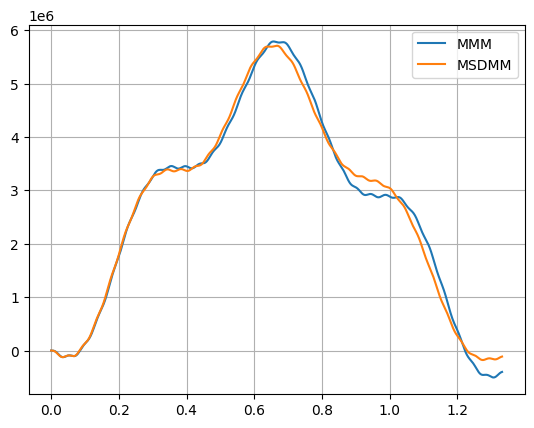

In [40]:
# plt.plot(MCFM_beam.t_vals, w_vals_MCFM, label='MCFM')
# plt.plot(MHFM_beam.t_vals, w_vals_MHFM, label='MHFM')
plt.plot(MMM_beam.t_vals, w_vals_MMM, label='MMM')
plt.plot(MSDMM_beam.t_vals, w_vals_MSDMM, label='MSDMM')
plt.grid(True)
plt.legend()

plt.figure()
# plt.plot(MCFM_beam.t_vals, M_vals_MCFM, label='MCFM')
# plt.plot(MHFM_beam.t_vals, M_vals_MHFM, label='MHFM')
plt.plot(MMM_beam.t_vals, M_vals_MMM, label='MMM')
plt.plot(MSDMM_beam.t_vals, M_vals_MSDMM, label='MSDMM')
plt.grid(True)
plt.legend()

In [34]:
print("mean difference", np.mean(abs(w_vals_MMM - w_vals_MSDMM)))

ValueError: operands could not be broadcast together with shapes (1000,) (10000,) 

In [ ]:
from scipy.signal import find_peaks

def plot_fft(w_vals, t_vals, label):
    dt = t_vals[1] - t_vals[0]
    N = len(w_vals)
    f = np.fft.fftfreq(N, dt)
    W = np.fft.fft(w_vals)
    positive_frequencies = f > 0
    plt.plot(f[positive_frequencies], abs(W[positive_frequencies]), label=label)

def print_frequencies(w_vals, t_vals, label):
    dt = t_vals[1] - t_vals[0]
    N = len(w_vals)
    f = np.fft.fftfreq(N, dt)
    W = np.fft.fft(w_vals)
    positive_frequencies = f > 0

    # Find peaks in the magnitude of the FFT
    peaks, _ = find_peaks(abs(W[positive_frequencies]))
    peak_frequencies = f[positive_frequencies][peaks]
    peak_magnitudes = abs(W[positive_frequencies][peaks])

    print(f"Frequency peaks for {label}:")
    for freq, mag in zip(peak_frequencies, peak_magnitudes):
        print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.2e}")

Frequency peaks for MCFM:
Frequency: 24.75 Hz, Magnitude: 1.55e-03
Frequency: 68.26 Hz, Magnitude: 4.30e-04
Frequency: 134.26 Hz, Magnitude: 1.62e-04
Frequency: 220.52 Hz, Magnitude: 1.07e-04
Frequency: 222.77 Hz, Magnitude: 1.02e-04
[  2.72767103  10.9106841   24.54903923  43.64273642  68.19177565
  98.19615693 133.65588027 174.57094566 220.9413531 ]


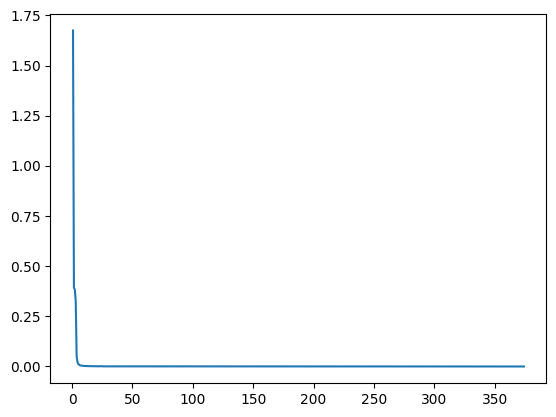

In [ ]:
plot_fft(w_vals_MCFM, MCFM_beam.t_vals, 'MCFM')
print_frequencies(w_vals_MCFM, MCFM_beam.t_vals, 'MCFM')
print(MCFM_beam.get_omega_n(np.arange(1, N+1)) / 2 / np.pi)

Frequency peaks for MMM:
Frequency: 2.25 Hz, Magnitude: 5.26e-01
Frequency: 9.75 Hz, Magnitude: 1.12e-02
Frequency: 23.25 Hz, Magnitude: 5.73e-03
Frequency: 25.50 Hz, Magnitude: 3.94e-03
Frequency: 64.51 Hz, Magnitude: 1.59e-03
Frequency: 68.26 Hz, Magnitude: 1.45e-03
Frequency: 118.51 Hz, Magnitude: 8.68e-04
Frequency: 123.76 Hz, Magnitude: 8.23e-04
Frequency: 175.51 Hz, Magnitude: 6.11e-04
[  2.72767103  10.9106841   24.54903923  43.64273642  68.19177565
  98.19615693 133.65588027 174.57094566 220.9413531 ]


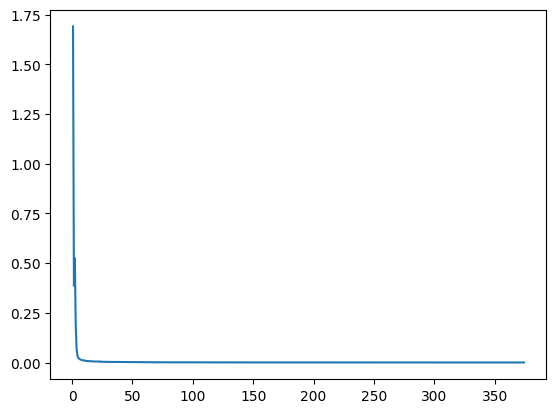

In [ ]:
plot_fft(w_vals_MMM, MMM_beam.t_vals, 'MMM')
print_frequencies(w_vals_MMM, MMM_beam.t_vals, 'MMM')
print(MMM_beam.get_omega_n(np.arange(1, N+1)) / 2 / np.pi)

In [ ]:
210 + 40*21

1050